In [16]:
# Import dependencies:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [2]:
# Read csv file consisting of cleaned data and store it in a dataframe:

data = "Data/cleaned_data.csv"
df = pd.read_csv(data)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_dmConLI,SaleType_dmConLw,SaleType_dmNew,SaleType_dmOth,SaleType_dmWD,SaleCondition_dmAdjLand,SaleCondition_dmAlloca,SaleCondition_dmFamily,SaleCondition_dmNormal,SaleCondition_dmPartial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
# Keep only the features that we want to test, as determined in the feature importance portion of data cleanup:

df = df[['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'FullBath',
 'LotArea',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'YearRemodAdd',
 'YearBuilt',
 'LotFrontage',
 'GarageYrBlt',
 'BsmtUnfSF',
 'OpenPorchSF',
 'MasVnrArea',
 'OverallCond',
 'WoodDeckSF','SalePrice']]

df.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,FullBath,LotArea,TotRmsAbvGrd,GarageCars,...,YearRemodAdd,YearBuilt,LotFrontage,GarageYrBlt,BsmtUnfSF,OpenPorchSF,MasVnrArea,OverallCond,WoodDeckSF,SalePrice
0,7,1710,854,856,706,856,2,8450,8,2,...,2003,2003,65.0,2003.0,150,61,196.0,5,0,208500
1,6,1262,0,1262,978,1262,2,9600,6,2,...,1976,1976,80.0,1976.0,284,0,0.0,8,298,181500
2,7,1786,866,920,486,920,2,11250,6,2,...,2002,2001,68.0,2001.0,434,42,162.0,5,0,223500
3,7,1717,756,756,216,961,1,9550,7,3,...,1970,1915,60.0,1998.0,540,35,0.0,5,0,140000
4,8,2198,1053,1145,655,1145,2,14260,9,3,...,2000,2000,84.0,2000.0,490,84,350.0,5,192,250000


In [4]:
# Extract the target variable from dataset:

X = df.drop(columns = ["SalePrice"])
Y = df["SalePrice"].values.reshape(-1, 1)

In [5]:
# Split data into train and test datasets:

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [8]:
# Create and fit linear regression model to train dataset:

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [9]:
# Make predictions using the model:

predictions = model.predict(X_test_scaled)

In [10]:
#pd.DataFrame({'predictions':predictions, 'y_test':y_test}).head(50)

In [11]:
#y_test.to_numpy(dtype=None, copy=False)

In [12]:
# Determine mean_squared_error and model accuracy score:

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

In [13]:
# Print mean squared error and model accuracy score:

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17448475693436868, R2: 0.814578325591161


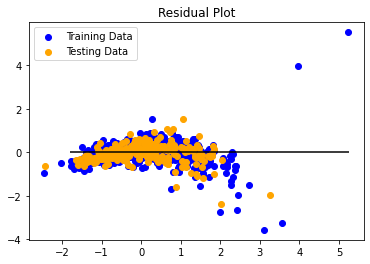

In [14]:
# Plot the model's predicted values and actual values:

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

# Hyperparamater Tuning

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: Invalid parameter alpha for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
grid.fit(X_train_scaled, y_train_scaled)

In [ ]:
# List the best parameters for this dataset
print(grid.best_params_)

In [ ]:
# List the best score
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

# LASSO model

In [21]:

# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1756094298104822, R2: 0.813383156846824


# Ridge model

In [18]:

# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17448432913207773, R2: 0.8145787802086215


In [22]:
from sklearn.model_selection import GridSearchCV

# find optimal alpha with grid search

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=3, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train_scaled)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.7132156049966767
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


# ElasticNet model

In [ ]:

# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")